<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [1]:
from tensorflow.keras.datasets import boston_housing

import tensorflow as tf

### Import Data

In [2]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

### Normalize

In [3]:
# Normalize data
X_train = tf.keras.utils.normalize(train_data, axis=1)
X_test = tf.keras.utils.normalize(test_data, axis=1)

In [4]:
X_train.shape

(404, 13)

### Import Models & Layers

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [6]:
# Instantiate Model
model = Sequential()

# Add layers
model.add(Dense(64, input_dim=13, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# Compile
model.compile(loss="mean_squared_error",
              optimizer="adam",
              metrics=["mean_squared_error"])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
model.fit(X_train, train_targets, epochs=20)

Epoch 1/20
404/404 [==============================] - 0s 234us/sample - loss: 560.0203 - mean_squared_error: 560.0203
Epoch 2/20
404/404 [==============================] - 0s 55us/sample - loss: 554.2070 - mean_squared_error: 554.2070
Epoch 3/20
404/404 [==============================] - 0s 75us/sample - loss: 548.5621 - mean_squared_error: 548.5621
Epoch 4/20
404/404 [==============================] - 0s 112us/sample - loss: 544.7645 - mean_squared_error: 544.7644
Epoch 5/20
404/404 [==============================] - 0s 86us/sample - loss: 543.2650 - mean_squared_error: 543.2651
Epoch 6/20
404/404 [==============================] - 0s 84us/sample - loss: 542.7863 - mean_squared_error: 542.7863
Epoch 7/20
404/404 [==============================] - 0s 94us/sample - loss: 542.6135 - mean_squared_error: 542.6135
Epoch 8/20
404/404 [==============================] - 0s 94us/sample - loss: 542.5384 - mean_squared_error: 542.5385
Epoch 9/20
404/404 [==============================] - 0s 89us/

In [8]:
# Assess model
scores = model.evaluate(X_test, test_targets)
print(f"{model.metrics_names[1]}: {scores[1]}")

102/102 [==============================] - 0s 360us/sample - loss: 570.7250 - mean_squared_error: 570.7250
mean_squared_error: 570.7250366210938


## Second Model

In [34]:
# Instantiate Model
model = Sequential()

# Add layers
model.add(Dense(64, input_dim=13, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# Compile
model.compile(loss="mean_squared_error",
              optimizer="rmsprop",
              metrics=["mean_squared_error"])

In [35]:
model.fit(X_train, train_targets, epochs=20)

Epoch 1/20
404/404 [==============================] - 0s 341us/sample - loss: 557.5742 - mean_squared_error: 557.5742
Epoch 2/20
404/404 [==============================] - 0s 78us/sample - loss: 549.5525 - mean_squared_error: 549.5526
Epoch 3/20
404/404 [==============================] - 0s 93us/sample - loss: 545.5746 - mean_squared_error: 545.5746
Epoch 4/20
404/404 [==============================] - 0s 112us/sample - loss: 543.7571 - mean_squared_error: 543.7571
Epoch 5/20
404/404 [==============================] - 0s 124us/sample - loss: 542.9802 - mean_squared_error: 542.9801
Epoch 6/20
404/404 [==============================] - 0s 106us/sample - loss: 542.6422 - mean_squared_error: 542.6423
Epoch 7/20
404/404 [==============================] - 0s 149us/sample - loss: 542.4936 - mean_squared_error: 542.4936
Epoch 8/20
404/404 [==============================] - 0s 112us/sample - loss: 542.4272 - mean_squared_error: 542.4272
Epoch 9/20
404/404 [==============================] - 0s 1

## GridSearchCV

In [9]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [23]:
def create_model():
    # Instantiate Model
    model = Sequential()

    # Add layers
    model.add(Dense(64, input_dim=13, activation="relu"))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))

    # Compile
    model.compile(loss="mean_squared_error",
                  optimizer="adam",
                  metrics=["mean_squared_error"])
    
    return model

# MSE: $542

In [24]:
model = KerasRegressor(build_fn = create_model)

In [28]:
params = dict(epochs=[10, 20, 50, 100],
              batch_size=[10, 20, 40, 60, 80, 100])

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
grid = GridSearchCV(estimator=model, param_grid=params, n_jobs=-1)
grid_result = grid.fit(X_train, train_targets)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Epoch 1/10
404/404 [==============================] - 0s 630us/sample - loss: 561.9009 - mean_squared_error: 561.9009
Epoch 2/10
404/404 [==============================] - 0s 78us/sample - loss: 555.0263 - mean_squared_error: 555.0262
Epoch 3/10
404/404 [==============================] - 0s 121us/sample - loss: 545.3324 - mean_squared_error: 545.3324
Epoch 4/10
404/404 [==============================] - 0s 99us/sample - loss: 542.4590 - mean_squared_error: 542.4590
Epoch 5/10
404/404 [==============================] - 0s 121us/sample - loss: 542.3713 - mean_squared_error: 542.3713
Epoch 6/10
404/404 [==============================] - 0s 158us/sample - loss: 542.3704 - mean_squared_error: 542.3704
Epoch 7/10
404/404 [==============================] - 0s 74us/sample - loss: 542.3704 - mean_squared_error: 542.3704
Epoch 8/10
404/404 [==============================] - 0s 101us/sample - loss: 542.3704 - mean_squared_error: 542.3704
Epoch 9/10
404/404 [==============================] - 0s 10

In [31]:
grid.best_params_

{'batch_size': 60, 'epochs': 10}

In [32]:
model.fit(X_train, train_targets, batch_size=60, epochs=10)

Epoch 1/10
404/404 [==============================] - 0s 414us/sample - loss: 563.1301 - mean_squared_error: 563.1301
Epoch 2/10
404/404 [==============================] - 0s 36us/sample - loss: 559.6331 - mean_squared_error: 559.6331
Epoch 3/10
404/404 [==============================] - 0s 97us/sample - loss: 551.7246 - mean_squared_error: 551.7246
Epoch 4/10
404/404 [==============================] - 0s 73us/sample - loss: 543.6646 - mean_squared_error: 543.6646
Epoch 5/10
404/404 [==============================] - 0s 78us/sample - loss: 542.3922 - mean_squared_error: 542.3922
Epoch 6/10
404/404 [==============================] - 0s 80us/sample - loss: 542.3707 - mean_squared_error: 542.3707
Epoch 7/10
404/404 [==============================] - 0s 102us/sample - loss: 542.3704 - mean_squared_error: 542.3704
Epoch 8/10
404/404 [==============================] - 0s 107us/sample - loss: 542.3704 - mean_squared_error: 542.3704
Epoch 9/10
404/404 [==============================] - 0s 134u

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [12]:
from tensorflow.keras.datasets import fashion_mnist

In [13]:
# Import Data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [14]:
import matplotlib.pyplot as plt

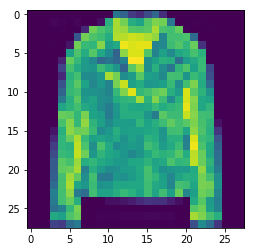

In [18]:
plt.imshow(X_train[205])

In [19]:
print(X_train.shape)
X_test.shape

(60000, 28, 28)


(10000, 28, 28)

In [22]:
# Normalize
from tensorflow.keras.utils import normalize
X_train = normalize(X_train)
X_test = normalize(X_test)

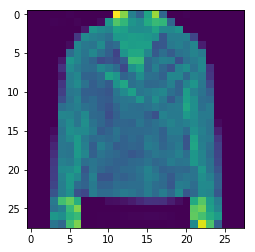

In [23]:
plt.imshow(X_train[205])

In [24]:
# Define Architecture #
model = tf.keras.models.Sequential()

# Flatten Data - Input Layer
model.add(tf.keras.layers.Flatten())

# Two hidden layers
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [25]:
# Training Params
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
# Train Model
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
60000/60000 [==============================] - 4s 74us/sample - loss: 0.4740 - acc: 0.8276
Epoch 2/50
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3503 - acc: 0.8711
Epoch 3/50
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3145 - acc: 0.8838
Epoch 4/50
60000/60000 [==============================] - 3s 54us/sample - loss: 0.2927 - acc: 0.8910
Epoch 5/50
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2761 - acc: 0.8962
Epoch 6/50
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2594 - acc: 0.9015
Epoch 7/50
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2467 - acc: 0.9068
Epoch 8/50
60000/60000 [==============================] - 5s 75us/sample - loss: 0.2366 - acc: 0.9104
Epoch 9/50
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2248 - acc: 0.9145
Epoch 10/50
60000/60000 [==============================] - 4s 67us/sample - loss: 

In [29]:
import numpy as np
predictions = model.predict(X_train)

4

In [36]:
# 0 - T-shirt
# 1 - Trousers
# 2 - Pullover
# 3 - Skirt
# 4 - Coat
# 5 - Sandal
# 6 - Shirt
# 7 - Sneaker
# 8 - Bag
# 9 - Boot
np.argmax(predictions[150])

9

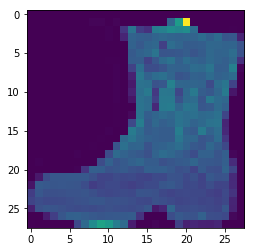

In [37]:
plt.imshow(X_train[150])

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.